In [1]:
import pandas as pd
import numpy as np
import warnings
from sklearn.metrics import recall_score, confusion_matrix, make_scorer, classification_report 
from sklearn.model_selection import GridSearchCV, train_test_split, cross_validate
from sklearn.manifold import TSNE
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns

sns.set_theme()
warnings.filterwarnings('ignore')

from sklearn import linear_model


kick1 = pd.read_csv('kick1.dat', sep = ' ', header = None, names = ['x', 'y', 'z'])
kick2 = pd.read_csv('kick2.dat', sep = ' ', header = None, names = ['x', 'y', 'z'])

In [2]:
time = np.linspace(0, 1/3, 20)

In [3]:
time[-1] + 0.017543859649122806

0.3508771929824561

In [4]:
time[3] - time[2] 

0.017543859649122806

In [5]:
X_train, X_test, y_train, y_test = train_test_split(time.reshape(-1, 1), kick2['x'], test_size=0.2, random_state=42)

reg = linear_model.LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [6]:
reg.predict(X_test)

array([-0.13400603, -0.54708475, -0.49848726, -0.15830478])

In [7]:
y_test

0    -0.105
17   -0.524
15   -0.514
1    -0.162
Name: x, dtype: float64

In [8]:
X_train, X_test, y_train, y_test = train_test_split(time.reshape(-1, 1), kick2['z'], test_size=0.2, random_state=42)

reg = linear_model.LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [9]:
reg.predict(X_test)

array([0.17293349, 0.29161559, 0.27765299, 0.17991479])

In [10]:
y_test

0     0.145
17    0.281
15    0.290
1     0.177
Name: z, dtype: float64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(time.reshape(-1, 1), kick2['y'], test_size=0.2, random_state=42)

reg = linear_model.LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [12]:
reg.predict(np.array(0.3508771929824561).reshape(-1, 1))

array([1.05391344])

In [13]:
y_test

0     2.048
17    1.201
15    1.295
1     1.999
Name: y, dtype: float64

## Classification

In [14]:
from sklearn.datasets import load_digits

digits = load_digits()
print(digits.data.shape)

(1797, 64)


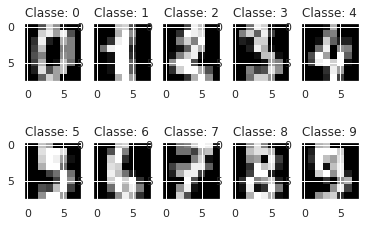

In [15]:
for i in range(1, 11):
    plt.subplot(2, 5, i)
    plt.imshow(digits.images[i-1], cmap=plt.cm.gray, vmax=16, interpolation='nearest')
    plt.title('Classe: {}'.format(i-1))
plt.show() 

In [16]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.1, random_state=42)


In [17]:
X_embedded_train = TSNE(n_components=2).fit_transform(X_train)
X_embedded_test = TSNE(n_components=2).fit_transform(X_test)

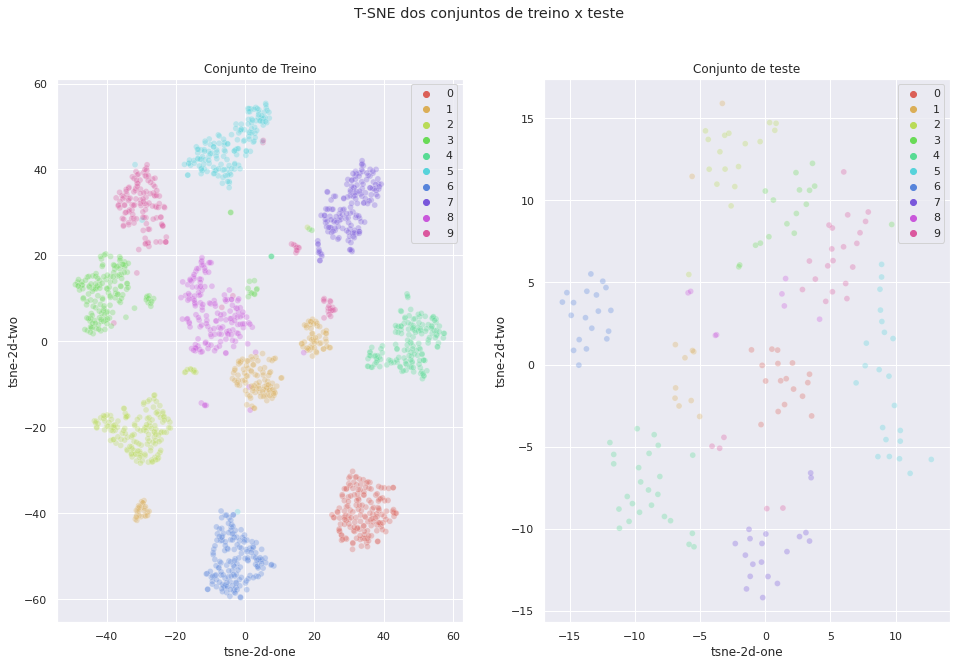

In [18]:
df_subset = pd.DataFrame()
df_test = pd.DataFrame()
df_subset['tsne-2d-one'] = X_embedded_train[:,0]
df_subset['tsne-2d-two'] = X_embedded_train[:,1]
df_test['tsne-2d-one'] = X_embedded_test[:,0]
df_test['tsne-2d-two'] = X_embedded_test[:,1]

plt.figure(figsize=(16,10))
plt.subplot(1,2,1)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue=y_train,
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3
)
plt.title('Conjunto de Treino')
plt.subplot(1,2,2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue=y_test,
    palette=sns.color_palette("hls", 10),
    data=df_test,
    legend="full",
    alpha=0.3
)
plt.title('Conjunto de teste')
plt.suptitle('T-SNE dos conjuntos de treino x teste')

plt.show()

------------------------------------------------------------------
# Tuning hyper-parameters for precision_weighted 

Best parameters set found on development set: n
{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}

 Grid scores on development set: 

0.990 (+/-0.005) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.972 (+/-0.007) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.990 (+/-0.007) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.987 (+/-0.012) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.990 (+/-0.007) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.989 (+/-0.009) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.990 (+/-0.007) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.989 (+/-0.009) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.980 (+/-0.012) for {'C': 1, 'kernel': 'linear'}
0.980 (+/-0.012) for {'C': 10, 'kernel': 'linear'}
0.980 (+/-0.012) for {'C': 100, 'kernel': 'linear'}
0.980 (+/-0.012) for {'C': 1000, 'kernel': 'linear'}

 Detailed classification repo

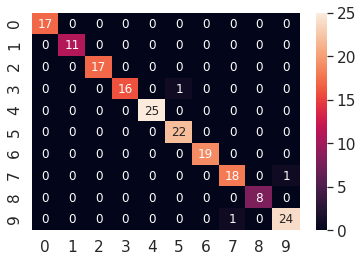

------------------------------------------------------------------
# Tuning hyper-parameters for recall_weighted 

Best parameters set found on development set: n
{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}

 Grid scores on development set: 

0.990 (+/-0.005) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.971 (+/-0.009) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.989 (+/-0.007) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.987 (+/-0.012) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.989 (+/-0.007) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.988 (+/-0.010) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.989 (+/-0.007) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.988 (+/-0.010) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.980 (+/-0.013) for {'C': 1, 'kernel': 'linear'}
0.980 (+/-0.013) for {'C': 10, 'kernel': 'linear'}
0.980 (+/-0.013) for {'C': 100, 'kernel': 'linear'}
0.980 (+/-0.013) for {'C': 1000, 'kernel': 'linear'}

 Detailed classification report:

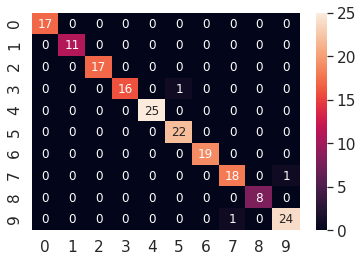

------------------------------------------------------------------
# Tuning hyper-parameters for f1_weighted 

Best parameters set found on development set: n
{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}

 Grid scores on development set: 

0.990 (+/-0.005) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.971 (+/-0.009) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.990 (+/-0.007) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.987 (+/-0.012) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.990 (+/-0.007) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.988 (+/-0.010) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.990 (+/-0.007) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.988 (+/-0.010) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.980 (+/-0.013) for {'C': 1, 'kernel': 'linear'}
0.980 (+/-0.013) for {'C': 10, 'kernel': 'linear'}
0.980 (+/-0.013) for {'C': 100, 'kernel': 'linear'}
0.980 (+/-0.013) for {'C': 1000, 'kernel': 'linear'}

 Detailed classification report:
The

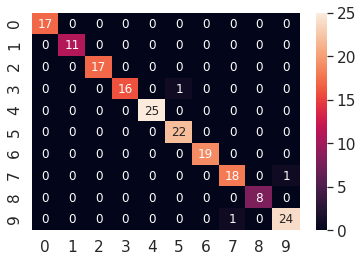

------------------------------------------------------------------
# Tuning hyper-parameters for balanced_accuracy 

Best parameters set found on development set: n
{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}

 Grid scores on development set: 

0.990 (+/-0.005) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.971 (+/-0.009) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.989 (+/-0.007) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.987 (+/-0.012) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.989 (+/-0.007) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.988 (+/-0.010) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.989 (+/-0.007) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.988 (+/-0.010) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.980 (+/-0.013) for {'C': 1, 'kernel': 'linear'}
0.980 (+/-0.013) for {'C': 10, 'kernel': 'linear'}
0.980 (+/-0.013) for {'C': 100, 'kernel': 'linear'}
0.980 (+/-0.013) for {'C': 1000, 'kernel': 'linear'}

 Detailed classification repor

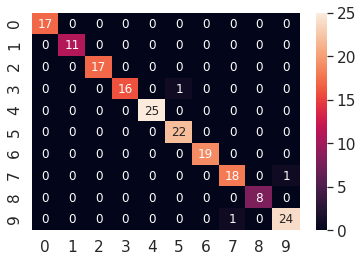

In [19]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision_weighted', 'recall_weighted', 'f1_weighted', 'balanced_accuracy']


for score in scores:
    print('------------------------------------------------------------------')
    print("# Tuning hyper-parameters for %s \n" % score)
   

    clf = GridSearchCV(SVC(), tuned_parameters, scoring=score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set: n")
    print(clf.best_params_)
   
    print("\n Grid scores on development set: \n")

    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    

    print("\n Detailed classification report:")

    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))

    conf_matrix = confusion_matrix(y_true, y_pred)
    df_cm = pd.DataFrame(conf_matrix, range(10), range(10))

    sns.set(font_scale=1.4)
    sns.heatmap(df_cm, annot=True, annot_kws={"size": 12}) # font size

    plt.show()
    


----------------------------------------------------------------------------------
# Tuning hyper-parameters for precision_weighted 

Best parameters set found on development set: n
{'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 2}

 Grid scores on development set: 

0.077 (+/-0.008) for {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1}
0.077 (+/-0.008) for {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 2}
0.077 (+/-0.008) for {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 3}
0.077 (+/-0.008) for {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 4}
0.212 (+/-0.026) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1}
0.212 (+/-0.026) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2}
0.212 (+/-0.026) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 3}
0.212 (+/-0.026) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 4}
0.426 (+/-0.038) for {'criterion': 'gini', 'max_depth': 3, 'mi

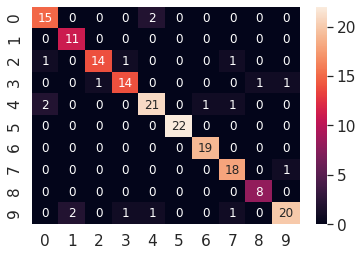

----------------------------------------------------------------------------------
# Tuning hyper-parameters for recall_weighted 

Best parameters set found on development set: n
{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 2}

 Grid scores on development set: 

0.203 (+/-0.007) for {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1}
0.203 (+/-0.007) for {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 2}
0.203 (+/-0.007) for {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 3}
0.203 (+/-0.007) for {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 4}
0.321 (+/-0.005) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1}
0.321 (+/-0.005) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2}
0.321 (+/-0.005) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 3}
0.321 (+/-0.005) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 4}
0.470 (+/-0.024) for {'criterion': 'gini', 'max_depth': 3, 'min_s

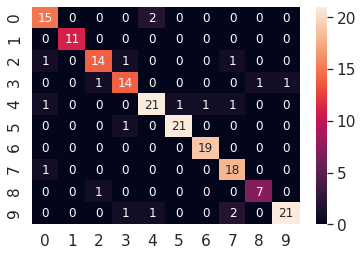

----------------------------------------------------------------------------------
# Tuning hyper-parameters for f1_weighted 

Best parameters set found on development set: n
{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 2}

 Grid scores on development set: 

0.101 (+/-0.005) for {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1}
0.101 (+/-0.005) for {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 2}
0.101 (+/-0.005) for {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 3}
0.101 (+/-0.005) for {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 4}
0.217 (+/-0.010) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1}
0.217 (+/-0.010) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2}
0.217 (+/-0.010) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 3}
0.217 (+/-0.010) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 4}
0.397 (+/-0.012) for {'criterion': 'gini', 'max_depth': 3, 'min_sampl

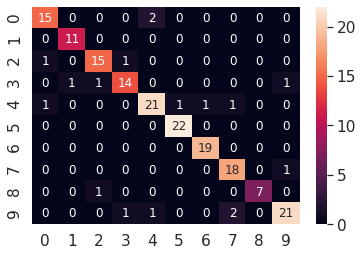

----------------------------------------------------------------------------------
# Tuning hyper-parameters for balanced_accuracy 

Best parameters set found on development set: n
{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 1}

 Grid scores on development set: 

0.198 (+/-0.005) for {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1}
0.198 (+/-0.005) for {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 2}
0.198 (+/-0.005) for {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 3}
0.198 (+/-0.005) for {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 4}
0.320 (+/-0.005) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1}
0.320 (+/-0.005) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2}
0.320 (+/-0.005) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 3}
0.320 (+/-0.005) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 4}
0.471 (+/-0.025) for {'criterion': 'gini', 'max_depth': 3, 'min

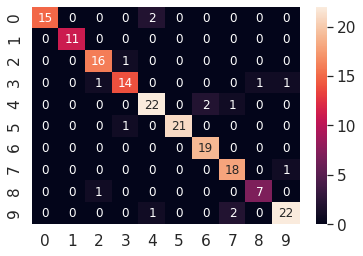

In [20]:
tuned_parameters = {"criterion":["gini", "entropy"],"max_depth": range(1,10), 
         "min_samples_leaf": range(1,5)}


scores = ['precision_weighted', 'recall_weighted', 'f1_weighted', 'balanced_accuracy']


for score in scores:
    print('----------------------------------------------------------------------------------')
    print("# Tuning hyper-parameters for %s \n" % score)
   

    clf = GridSearchCV(DecisionTreeClassifier(), tuned_parameters, scoring=score)
    clf.fit(X_train, y_train)
    
    print("Best parameters set found on development set: n")
    print(clf.best_params_)
    
    
    print("\n Grid scores on development set: \n")

    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    

    print("\n Detailed classification report:")

    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    
    conf_matrix = confusion_matrix(y_true, y_pred)
    df_cm = pd.DataFrame(conf_matrix, range(10), range(10))

    sns.set(font_scale=1.4)
    sns.heatmap(df_cm, annot=True, annot_kws={"size": 12}) # font size

    plt.show()
    
